 # Pandas 간단 소개


**학습 목표:**
  * *pandas* 라이브러리의 `DataFrame` 및 `Series` 데이터 구조에 관한 소개 확인하기
  * `DataFrame` 및 `Series` 내의 데이터 액세스 및 조작
  * *pandas* `DataFrame`으로 CSV 데이터 가져오기
  * `DataFrame`의 색인을 다시 생성하여 데이터 셔플
  

 ## 기본 개념

다음 행은 *Pandas* API를 가져와서 API 버전을 출력합니다.

[*Pandas*](http://Pandas.pydata.org/)는 열 중심 데이터 분석 API입니다. 입력 데이터를 처리하고 분석하는 데 효과적인 도구이며, 여러 ML 프레임워크에서도 *Pandas* 데이터 구조를 입력으로 지원합니다.

In [0]:
from __future__ import print_function

import pandas as pd
pd.__version__

'0.24.2'

 *Pandas*의 기본 데이터 구조는 두 가지 클래스로 구현됩니다.

  * **`DataFrame`**은 행 및 이름 지정된 열이 포함된 관계형 데이터 테이블이라고 생각할 수 있습니다.
  * **`Series`**는 하나의 열입니다. `DataFrame`에는 하나 이상의 `Series`와 각 `Series`의 이름이 포함됩니다.

데이터 프레임은 데이터 조작에 일반적으로 사용하는 추상화입니다. [Spark](https://spark.apache.org/) 및 [R](https://www.r-project.org/about.html)에 유사한 구현이 존재합니다.

In [0]:
pd.Series(['San Francisco', 'San Jose', 'Sacramento'])

0    San Francisco
1         San Jose
2       Sacramento
dtype: object

 `DataFrame` 객체는 `string` 열 이름과 매핑되는 'dict'를 각각의 `Series`에 전달하여 만들 수 있습니다. `Series`의 길이가 일치하지 않는 경우, 누락된 값은 특수 [NA/NaN](http://pandas.pydata.org/pandas-docs/stable/missing_data.html) 값으로 채워집니다. 예를 들면 다음과 같습니다.

In [0]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])

pd.DataFrame({ 'City name': city_names, 'Population': population })

,City name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


pd.read_csv("파일명",sep=",")  sep 의 default ','

[pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) 설명

In [0]:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [0]:
california_housing_dataframe.head()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff75fc024a8>]],
      dtype=object)

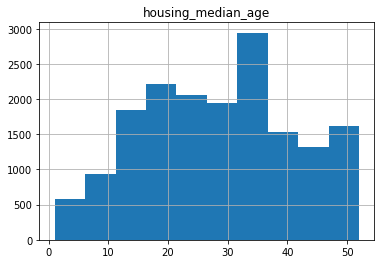

In [0]:
california_housing_dataframe.hist('housing_median_age')

 ## 데이터 액세스

익숙한 Python dict/list 작업을 사용하여 `DataFrame` 데이터에 액세스할 수 있습니다.

In [0]:
cities = pd.DataFrame({ 'City name': city_names, 'Population': population })
print(type(cities['City name']))
cities['City name']

<class 'pandas.core.series.Series'>


0    San Francisco
1         San Jose
2       Sacramento
Name: City name, dtype: object

In [0]:
print(type(cities['City name'][1]))
cities['City name'][1]

<class 'str'>


'San Jose'

In [0]:
print(type(cities[0:2]))
print(cities)
cities[0:2]

<class 'pandas.core.frame.DataFrame'>
       City name  Population
0  San Francisco      852469
1       San Jose     1015785
2     Sacramento      485199


,City name,Population
0,San Francisco,852469
1,San Jose,1015785


 ## 데이터 조작

Python의 기본 산술 연산을 `Series`에 적용할 수도 있습니다. 예를 들면 다음과 같습니다.

In [0]:
population / 1000.

0     852.469
1    1015.785
2     485.199
dtype: float64

Pandas Series는 대부분의 NumPy 함수에 인수로 사용할 수 있습니다.

In [0]:
import numpy as np

np.log(population)

0    13.655892
1    13.831172
2    13.092314
dtype: float64

 더 복잡한 단일 열 변환에는 `Series.apply`를 사용할 수 있습니다. Python [map 함수](https://docs.python.org/2/library/functions.html#map)처럼, 
`Series.apply`는 인수로 [lambda 함수](https://docs.python.org/2/tutorial/controlflow.html#lambda-expressions)를 허용하며, 이는 각 값에 적용됩니다.

아래의 예에서는 `인구`가 백만 명을 초과하는지 나타내는 새 `Series`를 만듭니다.

In [0]:
population.apply(lambda val: val > 1000000)

0    False
1     True
2    False
dtype: bool

 ## 실습 #1

다음 두 명제 *모두* True인 경우에만 True인 새 부울 열을 추가하여 `도시` 테이블을 수정합니다.

  * 도시 이름은 성인의 이름을 본따서 지었다.
  * 도시 면적이 130제곱킬로미터보다 넓다.

**참고:** 부울 `Series`는 기존 부울 연산자가 아닌 비트 연산자를 사용하여 결합할 수 있습니다. 예를 들어 *logical and*를 실행할 때 `and` 대신 `&`를 사용합니다.

**참고:** 스페인어에서 "San"은 "성인"의 의미입니다.

In [35]:
cities['Is wide and has saint name'] = (cities['Area square miles'] > 50) & cities['City name'].apply(lambda name: name.startswith('San'))
cities

,City name,Population,Area square miles,Population density,Is wide and has saint name,Is wide and dsadasd saint name
0,San Francisco,852469,46.87,18187.945381,False,False
1,San Jose,1015785,176.53,5754.177760,True,True
2,Sacramento,485199,97.92,4955.055147,False,False


 ## 색인
`Series`와 `DataFrame` 객체 모두 식별자 값을 각 `Series` 항목이나 `DataFrame` 행에 할당하는 `index` 속성을 정의합니다. 

기본적으로 생성 시 *Pandas*는 소스 데이터의 순서를 나타내는 색인 값을 할당합니다. 생성된 이후 색인 값은 고정됩니다. 즉, 데이터의 순서가 재정렬될 때 변하지 않습니다.

In [36]:
cities.reindex([2, 0, 1])

,City name,Population,Area square miles,Population density,Is wide and has saint name,Is wide and dsadasd saint name
2,Sacramento,485199,97.92,4955.055147,False,False
0,San Francisco,852469,46.87,18187.945381,False,False
1,San Jose,1015785,176.53,5754.177760,True,True


 `reindex` 입력 배열에 원래 `DataFrame` 색인 값에 없는 값을 포함하면 `reindex`가 이 \'누락된\' 색인에 새 행을 추가하고 모든 해당 열을 `NaN` 값으로 채웁니다.    (0, 4 ,5 2)

In [0]:
#@title 답
cities.reindex([0, 4, 5, 2])

랜덤으로 인덱스 출력

In [0]:
cities.reindex(np.random.permutation(cities.index))

-------------------------------------------------------------------------------------------------------

---



 # 텐서플로우 첫걸음

 **학습 목표:**
  * 텐서플로우의 기초 개념을 학습한다
  * 텐서플로우의 `LinearRegressor` 클래스를 사용하여 입력 특성 하나를 기반으로 지역별 주택 가격 중앙값을 예측한다
  * 평균 제곱근 오차(RMSE)를 사용하여 모델 예측의 정확성을 평가한다
  * 초매개변수를 조정하여 모델의 정확성을 개선한다

 ## 설정
첫 번째 셀에서 필요한 라이브러리를 로드하겠습니다.


[__future__](https://jangjy.tistory.com/291)

In [0]:
from __future__ import print_function

import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

In [0]:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")

 확률적 경사하강법의 성능에 악영향을 줄 수 있는 의도치 않은 정렬 효과를 방지하고자 데이터를 무작위로 추출하겠습니다. 또한 일반적으로 사용하는 학습률 범위에서 보다 쉽게 학습할 수 있도록 `median_house_value`를 천 단위로 조정하겠습니다.

 ## 데이터 조사

데이터를 본격적으로 다루기 전에 잠시 살펴보는 것이 좋습니다.

각 열에 대해 예의 개수, 평균, 표준편차, 최대값, 최소값, 다양한 분위 등 몇 가지 유용한 통계를 간단히 요약하여 출력해 보겠습니다.

In [0]:
california_housing_dataframe = california_housing_dataframe.reindex(
    np.random.permutation(california_housing_dataframe.index))
california_housing_dataframe["median_house_value"] /= 1000.0
california_housing_dataframe

In [43]:
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,0.207301
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,0.115984
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.014999
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,0.119400
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,0.180400
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,0.265000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,0.500001


 ## 첫 번째 모델 만들기

이 실습에서는 라벨(타겟이라고도 함) 역할을 하는 `median_house_value`에 대한 예측을 시도합니다. 입력 특성으로는 `total_rooms`를 사용합니다.

**참고:** 데이터는 지역 단위이므로 이 특성은 해당 지역의 전체 방 수를 나타냅니다.

모델을 학습시키려면 텐서플로우 [Estimator](https://www.tensorflow.org/get_started/estimator) API가 제공하는 [LinearRegressor](https://www.tensorflow.org/api_docs/python/tf/estimator/LinearRegressor) 인터페이스를 사용합니다. 이 API는 저수준 모델 작업을 알아서 처리하고 모델 학습, 평가, 추론을 수행하는 데 편리하게 사용되는 메소드를 노출합니다.

 ### 1단계: 특성 정의 및 특성 열 구성

 학습 데이터를 텐서플로우로 가져오려면 각 특성에 들어있는 데이터 유형을 지정해야 합니다. 이 실습과 이후 실습에서는 주로 2가지 데이터 유형을 사용합니다.

* **범주형 데이터**: 텍스트로 이루어진 데이터입니다. 이 실습의 주택 데이터 세트는 범주형 데이터를 포함하지 않지만 주택 양식, 부동산 광고 문구 등의 예를 보게 될 수도 있습니다.

* **수치 데이터**: 정수 또는 부동 소수점 숫자이며 숫자로 취급하려는 데이터입니다. 이후에도 설명하겠지만, 우편번호 등의 수치 데이터는 범주형으로 취급하는 경우도 있습니다.

텐서플로우에서 특성의 데이터 유형을 지정하려면 **특성 열**이라는 구조체를 사용합니다. 특성 열은 특성 데이터에 대한 설명만 저장하며 특성 데이터 자체는 포함하지 않습니다.

우선은 `total_rooms`라는 수치 입력 데이터 하나만 사용하겠습니다. 다음 코드에서는 `california_housing_dataframe`에서 `total_rooms` 데이터를 추출하고 `numeric_column`으로 특성 열을 정의하여 데이터가 숫자임을 지정합니다.

In [44]:
# Define the input feature: total_rooms.
my_feature = california_housing_dataframe[["total_rooms"]]

# Configure a numeric feature column for total_rooms.
feature_columns = [tf.feature_column.numeric_column("total_rooms")]

NameError: ignored

 ### 2단계: 타겟 정의

 다음으로는 타겟인 `median_house_value`를 정의합니다. 이 데이터도 `california_housing_dataframe`에서 가져옵니다.

In [0]:
# Define the label.
targets = california_housing_dataframe["median_house_value"]

 ### 3단계: LinearRegressor 구성

 다음으로는 LinearRegressor를 사용하여 선형 회귀 모델을구성합니다. 미니 배치 확률적 경사하강법(SGD)을 구현하는 `GradientDescentOptimizer`를 사용하여 이 모델을 학습시킬 것입니다. `learning_rate` 인수는 경사 단계의 크기를 조절합니다.

**참고:** 안전을 위해 옵티마이저에 `clip_gradients_by_norm`을 통해 [경사 제한](https://developers.google.com/machine-learning/glossary/#gradient_clipping)을 적용합니다. 경사 제한은 학습 중에 경사가 너무 커져서 경사하강법이 실패하는 경우가 나타나지 않도록 제한합니다. 


[경사하강법](https://developers.google.com/machine-learning/crash-course/fitter/graph)

In [46]:
# Use gradient descent as the optimizer for training the model.
my_optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.0000001)
my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)

# Configure the linear regression model with our feature columns and optimizer.
# Set a learning rate of 0.0000001 for Gradient Descent.
linear_regressor = tf.estimator.LinearRegressor(
    feature_columns=feature_columns,
    optimizer=my_optimizer
)

NameError: ignored